In [1]:
import numpy as np
import os
import astropy.io.fits as fits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/'
f_name=work_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001.fits'
hdul=fits.open(f_name)
N=np.size(hdul[0].data)

In [3]:
y_data=hdul[1].data
wl=hdul[0].data

In [4]:
sel_wl=(wl<25000) & (wl>2500)
wl=wl[sel_wl]
y_data=y_data[...,sel_wl]
N_wl=np.size(wl)
N_models=np.size(hdul[1].data, axis=0)
norm=np.zeros(N_models)

In [5]:
for i_model in range(0, N_models):
    for i_wl in range (0, np.size(wl)-1):
        d_wl=wl[i_wl+1]-wl[i_wl]
        y_mean=(y_data[i_model, i_wl+1]+y_data[i_model, i_wl])/2.0
        norm[i_model]=norm[i_model]+d_wl*y_mean
    

In [6]:
for i_model in range(0, N_models):
    y_data[i_model, ...]=y_data[i_model, ...]/norm[i_model]

In [7]:
y=StandardScaler().fit_transform(y_data)

In [54]:
pc=60
pca=PCA(n_components=pc)

In [55]:
y_proj=pca.fit_transform(y)

In [56]:
pca.explained_variance_ratio_

array([5.53918280e-01, 4.17903277e-01, 2.27029871e-02, 2.34937222e-03,
       1.46222343e-03, 7.64562869e-04, 2.63711444e-04, 1.48929609e-04,
       1.10900163e-04, 6.31535954e-05, 5.19392353e-05, 4.37849194e-05,
       3.17467982e-05, 2.60967320e-05, 2.19186250e-05, 1.58937016e-05,
       1.47439410e-05, 1.42767262e-05, 1.20841325e-05, 8.51861418e-06,
       7.26386850e-06, 6.89383750e-06, 6.01694616e-06, 4.78648752e-06,
       4.33775688e-06, 4.12016531e-06, 3.58858956e-06, 3.00302077e-06,
       2.90759506e-06, 2.31029009e-06, 2.13071826e-06, 1.89325682e-06,
       1.75695317e-06, 1.60063489e-06, 1.32722700e-06, 1.16461210e-06,
       1.08392376e-06, 9.67653536e-07, 9.21323398e-07, 8.43492726e-07,
       7.82255568e-07, 7.15455117e-07, 6.56193675e-07, 6.33368537e-07,
       5.61941523e-07, 5.44629909e-07, 5.31645934e-07, 5.10076753e-07,
       4.51952271e-07, 4.22559246e-07, 3.44137368e-07, 3.33632801e-07,
       3.24921437e-07, 2.98656974e-07, 2.75841543e-07, 2.53688087e-07,
      

In [57]:
y_new=(np.dot(y_proj, pca.components_)*np.std(y_data, axis=0)+np.mean(y_data, axis=0))

Text(0, 0.5, '$f_{true}/f_{bol}$')

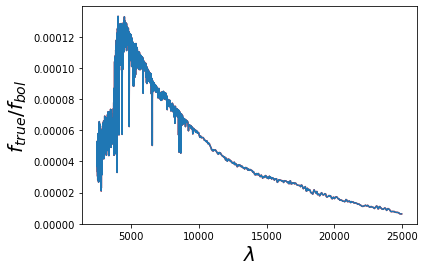

In [71]:
idx=1 #139
selected=(wl>3800)&(wl<4200)

import matplotlib.pyplot as plt
plt.plot(wl, (y_data[idx,...]), color='red')
plt.plot(wl,(y_new[idx,...]))
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$f_{true}/f_{bol}$',size=20)

Text(0.5, 1.0, '$PC=$60')

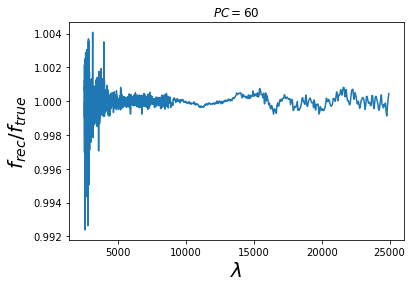

In [72]:
plt.plot(wl, y_new[idx,...]/y_data[idx,...])
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$f_{rec}/f_{true}$', size=20)
plt.title(r'$PC=$'+str(pc))

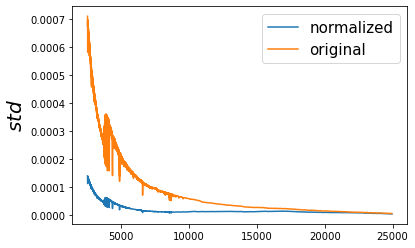

In [49]:
plt.plot(wl,np.std(y_data,axis=0), label='normalized')
plt.plot(wl,np.std(hdul[1].data[...,sel_wl],axis=0), label='original')
plt.ylabel(r'$std$', size=20)
plt.legend(loc='upper right', fontsize=15)

Text(0, 0.5, '$PC1$')

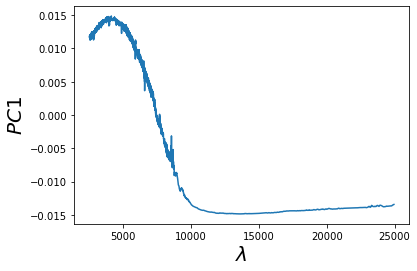

In [23]:
plt.plot(wl, pca.components_[0,...])
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$PC1$', size=20)

Text(0, 0.5, '$PC7$')

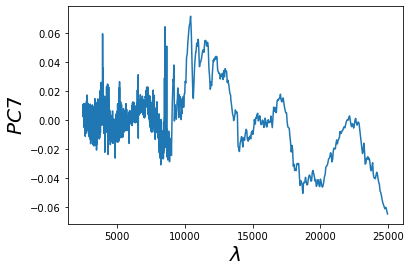

In [24]:
plt.plot(wl, pca.components_[6,...])
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$PC7$', size=20)

Text(0, 0.5, '$PC21$')

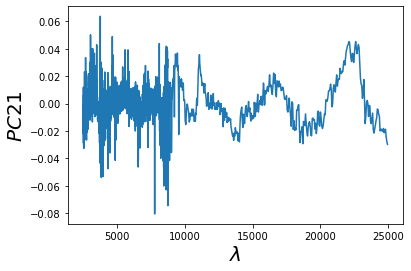

In [25]:
plt.plot(wl, pca.components_[20,...])
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$PC21$', size=20)